# Chapter 3.3: Maricopa County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import clean_deaths, clean_cases

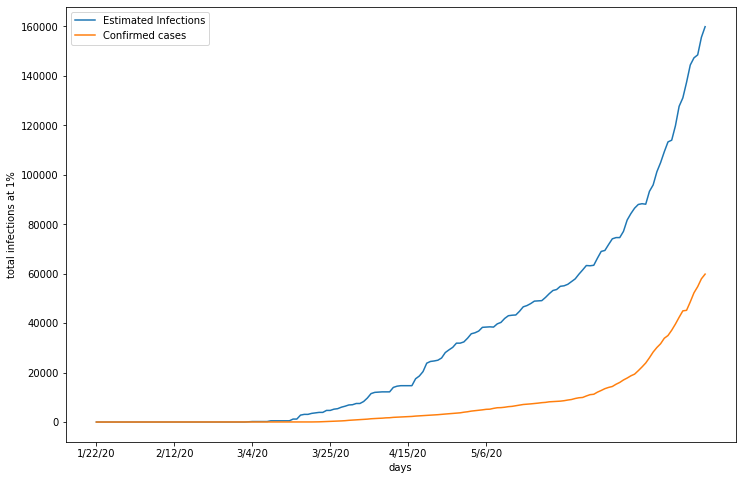

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

cases_df = clean_cases(cases_df)

deaths_df_MC = deaths_df.iloc[103,:]
deaths_df_MC = deaths_df_MC.reset_index()
cases_df_MC = cases_df.iloc[103,:]
cases_df_MC = cases_df_MC.reset_index()

index_val = len(cases_df_MC.index)

for ind in deaths_df_MC.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_MC.loc[ind, 'total_infections'] = 0
    else:
        deaths_df_MC.loc[ind, 'total_infections'] = deaths_df_MC.iloc[ind+18, 1] * 100

deaths_df_MC = deaths_df_MC[0:-18]

merged_df_MC = pd.merge(deaths_df_MC, cases_df_MC, on = 'index', suffixes = ['_deaths', '_cases'])
merged_df_MC['detection_rate'] = merged_df_MC['103_cases'] / merged_df_MC['total_infections']

plt.figure(figsize=(12,8))
plt.plot(merged_df_MC['index'], merged_df_MC['total_infections'], label='Estimated Infections')
plt.plot(merged_df_MC['index'], merged_df_MC['103_cases'], label='Confirmed cases')
plt.xticks(np.arange(0, 111, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

This graph displays Maricopa's estimated number of infeections, calculated with death counts and a death rate of 1%, and the the number of confimred cases of COVID 19. Both infection estimate and confirmed cases are on a accelerating trajectory, but similar to LA county, Maricopa's confirmed case count is substantially lower than the possible true number of infections. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118a34950>]],
      dtype=object)

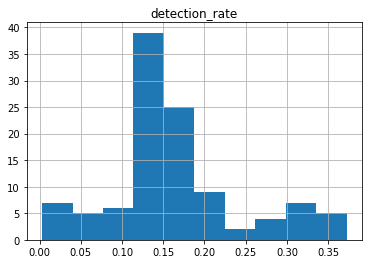

In [3]:
merged_df_MC = merged_df_MC[55:-1]
merged_df_MC.hist(column='detection_rate', bins=10)

To determine the average detection rate in Maricopa county, the number of reported cases is divided by it's esetimated counterpart for each date. As displayed in the histogram, Maricopa appears to detect approximately 10-20% of all COVID 19 cases. 

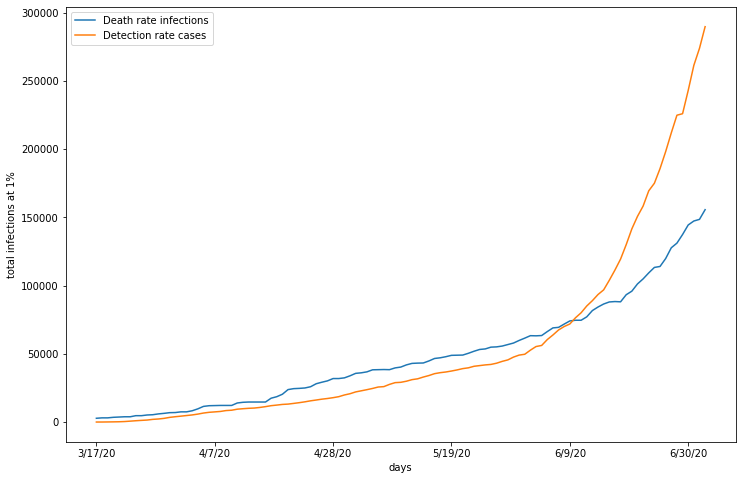

In [4]:
merged_df_MC['detection_cases'] = merged_df_MC['103_cases'] / 0.2

plt.figure(figsize=(12,8))
plt.plot(merged_df_MC['index'], merged_df_MC['total_infections'], label='Death rate infections')
plt.plot(merged_df_MC['index'], merged_df_MC['detection_cases'], label='Detection rate cases')
plt.xticks(np.arange(0, 111, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

Maricopa’s detection rate ranges from approximately 10-20%. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating a detection-rate based infection-estimate with the death-rate based infection-estimate, the validity of both estimation methods can be evaluated. In this graph I chose a conservative 20% detection rate, and divided confirmed cases by that decimal aproximation. To cross validate for accuracy, the detection rate cases are compared to the original infection estimation based on a 1% death rate and reported deaths. As you can see, the two estimates follow similar trajectorys, with death rate calculated infections reporting higher infections until approximately June 2nd, where they cross over. One possible explanation for this is poor testing practices, especially in the early stages of COVID 19. It's relatively safe to assume that counties were under reporting COVID 19 cases due to a shortage of kits and other factors. As more tests become available, many people take the initiative to get themselves tested, regardless of symptoms present. 